In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Some preprocessing

In [2]:
data = pd.read_csv('Pokemon.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
# drop unimportant colums
data = data.drop(['#', 'Name','Type 2'],1)

### Visualization

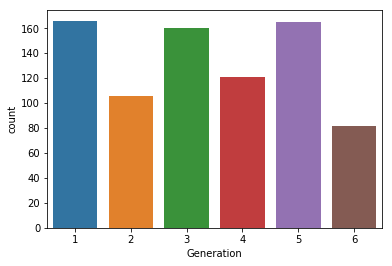

In [5]:
# distribution of generations
sn.countplot(data['Generation'])

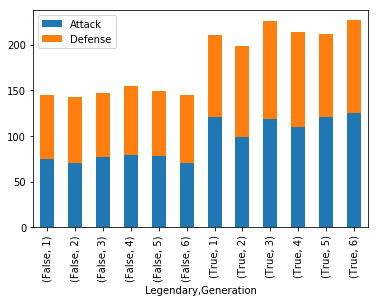

In [6]:
# figure out what legendary is
pokemon_stats_legendary = data.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense']]
pokemon_stats_legendary.plot.bar(stacked=True)

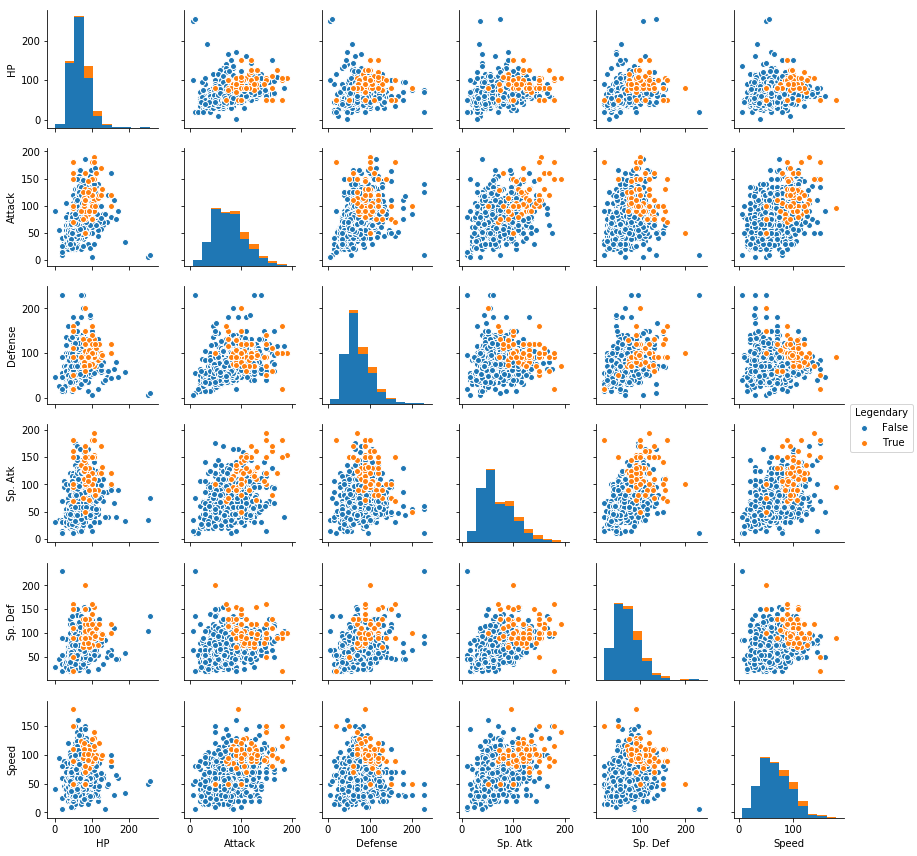

In [7]:
# pair plot of stats
sn.pairplot(data, vars=['HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed'],
            hue='Legendary',size=2);

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


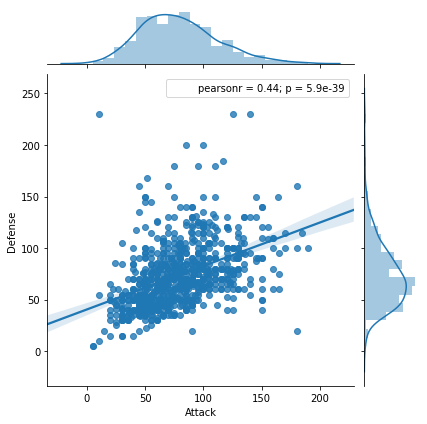

In [8]:
# try to find correlations
sn.jointplot(x='Attack', y='Defense', data=data,kind='reg')

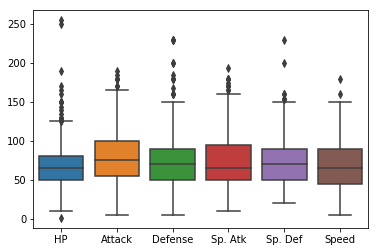

In [9]:
# simple box plot
df_box = data.drop(['Generation', 'Legendary','Total'],1)
sn.boxplot(data=df_box);

In [10]:
df_box = data.drop(['Legendary','Total','Type 1'],1)
pkmn = pd.melt(df_box, id_vars=["Generation"], var_name="Stat")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


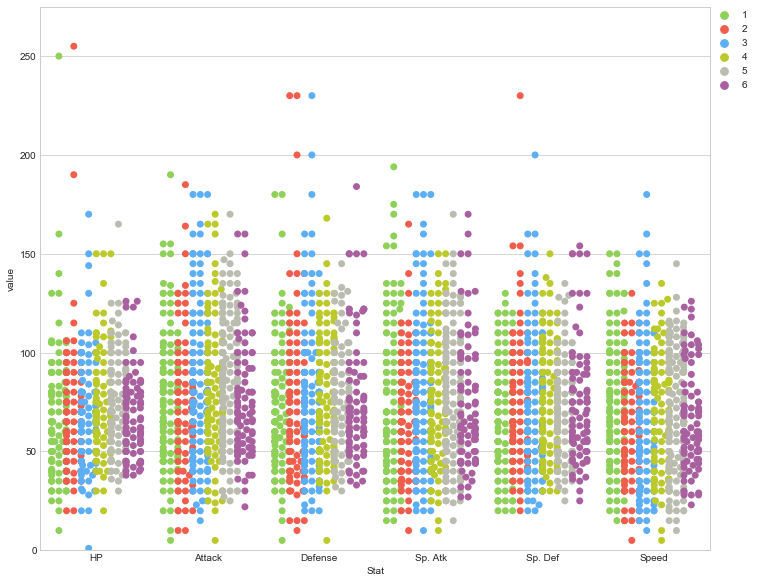

In [11]:
# Advance box plot
sn.set_style("whitegrid")
with sn.color_palette([
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9):
    plt.figure(figsize=(12,10))
    plt.ylim(0, 275)
    sn.swarmplot(x="Stat", y="value", data=pkmn, hue="Generation", split=True, size=7)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

### Outliers

In [12]:
# find quantiles
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

Total         185.00
HP             30.00
Attack         45.00
Defense        40.00
Sp. Atk        45.25
Sp. Def        40.00
Speed          45.00
Generation      3.00
Legendary       0.00
dtype: float64

In [13]:
# check shape before
data.shape

(800, 10)

In [14]:
# Delet outliers
data_out = data[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
df =data[~((data_out < (Q1 - 1.5 * IQR)) |(data_out > (Q3 + 1.5 * IQR))).any(axis=1)]

In [15]:
# check shape after
df.shape

(748, 10)

### Training models

In [16]:
# define target and split

targets = df['Generation'].astype('category')
df = df.drop(['Generation'],1)

df =pd.get_dummies(df,columns=['Type 1'])
#df = StandardScaler().fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(df, targets, test_size=0.4, random_state=100)

In [166]:
# define Zoo of models
LogReg = LogisticRegression(random_state=40, solver='lbfgs', multi_class='multinomial', max_iter=300)
neigh = KNeighborsClassifier(n_neighbors=3)
NCentr = NearestCentroid(shrink_threshold=2)
Ridge = RidgeClassifier(alpha=9,random_state=42)
DecTree = DecisionTreeClassifier(random_state=11)

algorithms = (
        ('LogReg', LogReg),
        ('KNN', neigh),
        ('NCentr', NCentr),
        ('Ridge', Ridge),
        ('DecTree', DecTree))

Algorithm  LogReg
Max of 10 cross_val = 0.23376623376623376 

             precision    recall  f1-score   support

          1       0.24      0.39      0.30        57
          2       0.20      0.07      0.10        46
          3       0.15      0.13      0.14        52
          4       0.15      0.14      0.15        49
          5       0.28      0.38      0.32        65
          6       0.42      0.16      0.23        31

avg / total       0.23      0.23      0.21       300

Algorithm  KNN
Max of 10 cross_val = 0.3333333333333333 

             precision    recall  f1-score   support

          1       0.24      0.54      0.34        57
          2       0.12      0.11      0.12        46
          3       0.25      0.27      0.26        52
          4       0.28      0.16      0.21        49
          5       0.34      0.17      0.23        65
          6       0.25      0.13      0.17        31

avg / total       0.25      0.24      0.23       300

Algorithm  NCentr
Max of 1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Max of 10 cross_val = 0.24675324675324675 

             precision    recall  f1-score   support

          1       0.25      0.47      0.33        57
          2       0.20      0.04      0.07        46
          3       0.20      0.21      0.21        52
          4       0.14      0.08      0.10        49
          5       0.30      0.38      0.34        65
          6       0.27      0.13      0.17        31

avg / total       0.23      0.24      0.22       300

Algorithm  DecTree
Max of 10 cross_val = 0.2702702702702703 

             precision    recall  f1-score   support

          1       0.25      0.32      0.28        57
          2       0.17      0.09      0.11        46
          3       0.25      0.37      0.29        52
          4       0.29      0.22      0.25        49
          5       0.38      0.34      0.36        65
          6       0.26      0.26      0.26        31

avg / total       0.27      0.27      0.27       300



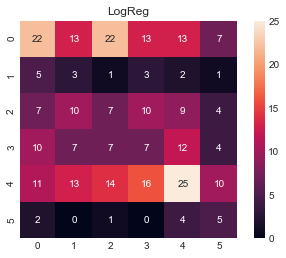

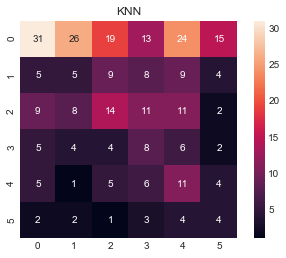

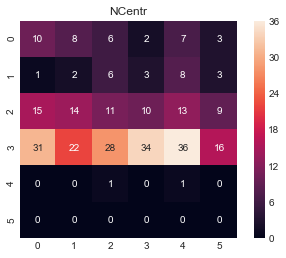

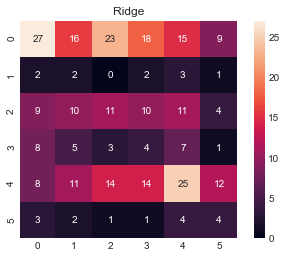

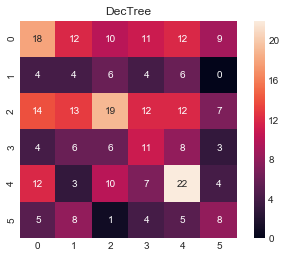

In [167]:
# Run algorithms
for name, algorithm in algorithms:
    print ('Algorithm ', name)
    
    algorithm.fit(X_train, y_train)
    y_pred =algorithm.predict(X_test)
    print('Max of 10 cross_val =',max(cross_val_score(algorithm, df, targets, cv=10)),'\n')
    
    plt.figure(name)
    mat = confusion_matrix(y_test, y_pred)
    sn.heatmap(mat.T,square=True,annot=True, fmt='d',).set_title(name)
    
    print(classification_report(y_test,y_pred))

## Best model - Decision Tree

Result prove that classify generation of pokemon is very hard based on stats, that shows us that almost all generations are equal by stats

             precision    recall  f1-score   support

          1       0.25      0.28      0.27        57
          2       0.28      0.15      0.20        46
          3       0.25      0.35      0.29        52
          4       0.26      0.24      0.25        49
          5       0.35      0.32      0.34        65
          6       0.24      0.26      0.25        31

avg / total       0.28      0.27      0.27       300



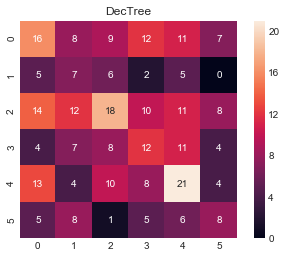

In [165]:
# some tune for model
DecTree = DecisionTreeClassifier(random_state=11,min_impurity_decrease=0.0009)
DecTree.fit(X_train, y_train)
y_pred =DecTree.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
sn.heatmap(mat.T,square=True,annot=True, fmt='d',).set_title(name)
    
print(classification_report(y_test,y_pred))